# **Preprocessing**

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv("Train_Data.csv")
df.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


# Feature Engineering

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_cols = ["BMXBMI", "LBXGLU", "LBXGLT", "LBXIN"]
cat_cols = ["RIAGENDR", "PAQ605", "DIQ010", "age_group"]

num_imputer = SimpleImputer(strategy= "mean")
cat_imputer = SimpleImputer(strategy= "most_frequent")

preprocesser = ColumnTransformer(
    transformers = [
        ("num", num_imputer, num_cols),
        ("cat", cat_imputer, cat_cols)
    ]
)

df = pd.DataFrame(preprocesser.fit_transform(df), columns = num_cols + cat_cols)

In [ ]:
df.head()

,BMXBMI,LBXGLU,LBXGLT,LBXIN,RIAGENDR,PAQ605,DIQ010,age_group
0,35.7,110.0,150.0,14.91,2.0,2.0,2.0,Adult
1,20.3,89.0,80.0,3.85,2.0,2.0,2.0,Adult
2,23.2,89.0,68.0,6.14,1.0,2.0,2.0,Adult
3,28.9,104.0,84.0,16.15,1.0,2.0,2.0,Adult
4,35.9,103.0,81.0,10.92,2.0,1.0,2.0,Adult


In [ ]:
df.isnull().sum()

,0
BMXBMI,0
LBXGLU,0
LBXGLT,0
LBXIN,0
RIAGENDR,0
PAQ605,0
DIQ010,0
age_group,0


In [ ]:
df["age_group"] = df["age_group"].map({
    "Adult" : 0,
    "Senior" : 1
})

In [ ]:
df["age_group"].unique()

array([0, 1])

In [ ]:
cols_to_convert = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN', 'RIAGENDR', 'PAQ605', 'DIQ010']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[cols_to_convert].dtypes

,0
BMXBMI,float64
LBXGLU,float64
LBXGLT,float64
LBXIN,float64
RIAGENDR,float64
PAQ605,float64
DIQ010,float64


In [ ]:
df["age_group"].value_counts()

,count
age_group,
0,1652
1,314


In [ ]:
from scipy.stats.mstats import winsorize

for col in ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']:
    df[col] = winsorize(df[col], limits=[0.01, 0.01])

# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("Shape of the dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

Shape of the dataset: (1966, 8)

Data Types:
 BMXBMI       float64
LBXGLU       float64
LBXGLT       float64
LBXIN        float64
RIAGENDR     float64
PAQ605       float64
DIQ010       float64
age_group      int64
dtype: object

Missing Values:
 BMXBMI       0
LBXGLU       0
LBXGLT       0
LBXIN        0
RIAGENDR     0
PAQ605       0
DIQ010       0
age_group    0
dtype: int64

Summary Statistics:
             BMXBMI       LBXGLU       LBXGLT        LBXIN     RIAGENDR  \
count  1966.000000  1966.000000  1966.000000  1966.000000  1966.000000   
mean     27.914485    98.984936   114.649875    11.748879     1.514751   
std       7.036594    12.253071    42.752601     9.075328     0.499910   
min      16.900000    76.000000    51.000000     1.860000     1.000000   
25%      22.800000    91.000000    87.000000     5.805000     1.000000   
50%      26.900000    97.000000   105.000000     9.060000     2.000000   
75%      31.200000   104.000000   130.000000    14.447500     2.000000   
max    

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask'

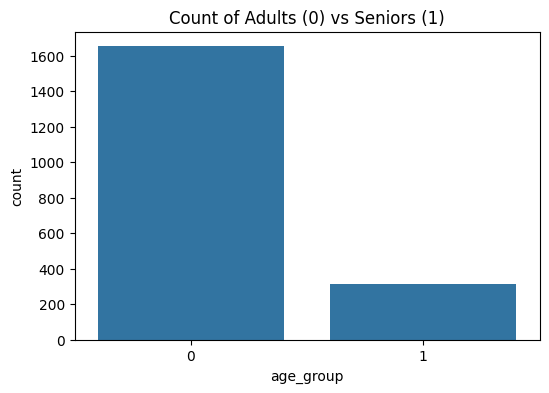

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="age_group", data=df)
plt.title("Count of Adults (0) vs Seniors (1)")
plt.show()

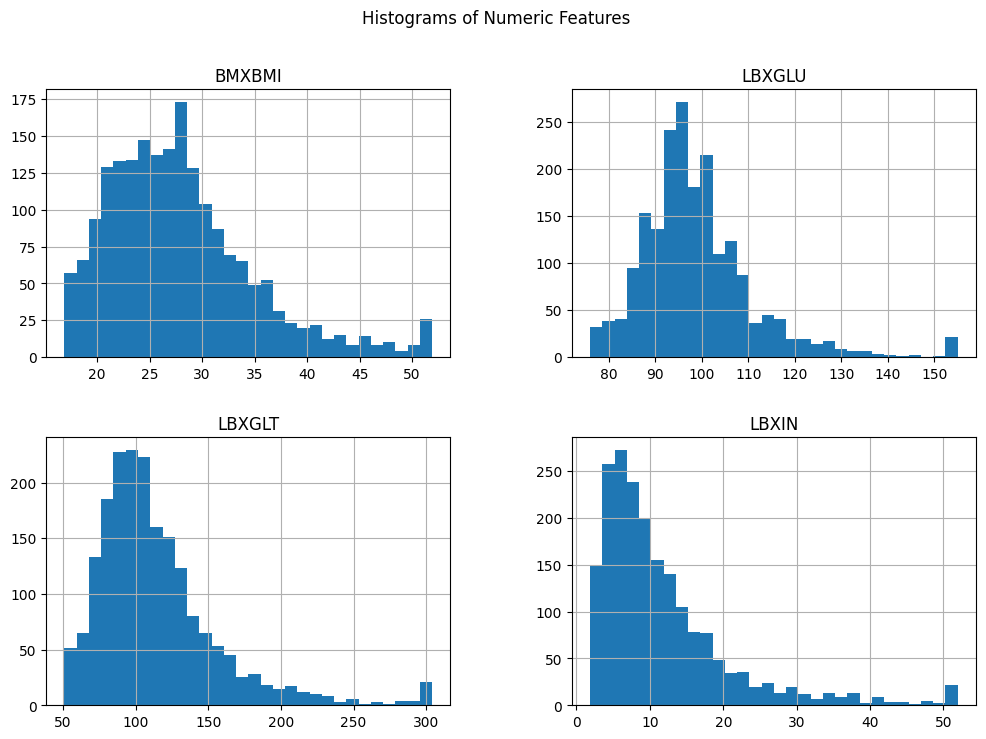

In [ ]:
numeric_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']
df[numeric_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Histograms of Numeric Features")
plt.show()


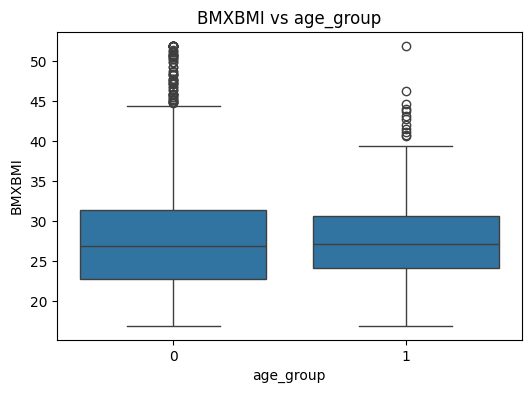

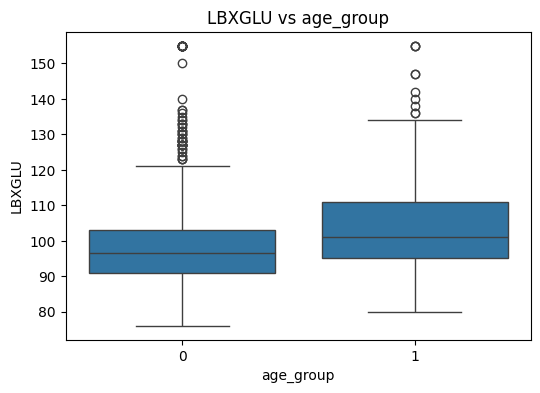

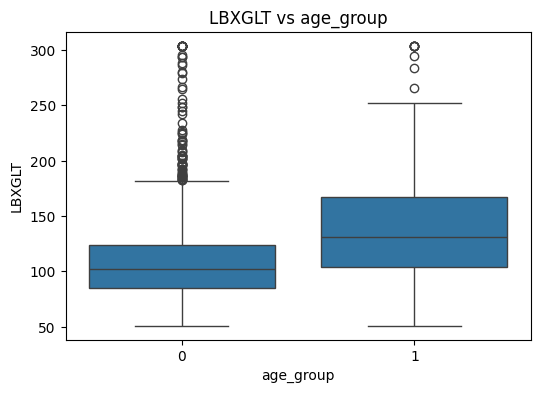

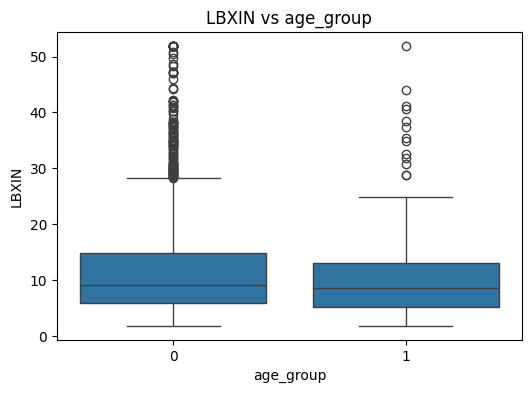

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='age_group', y=col, data=df)
    plt.title(f"{col} vs age_group")
    plt.show()

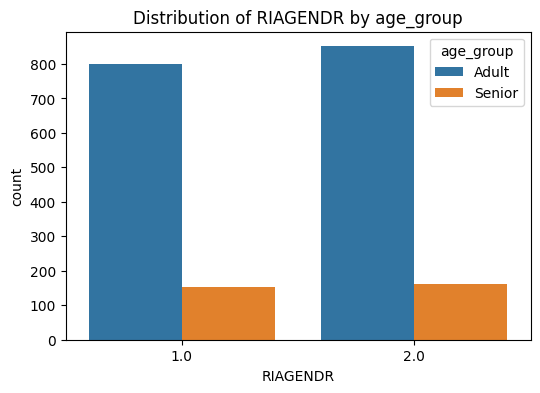

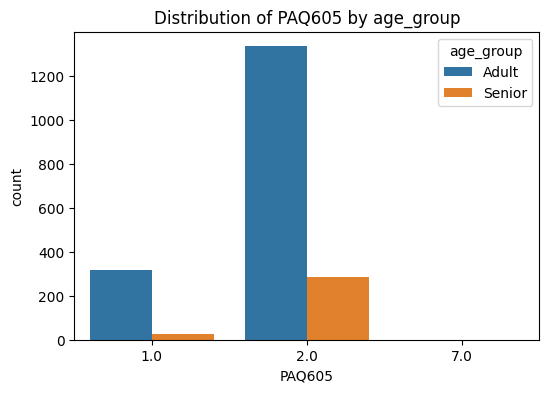

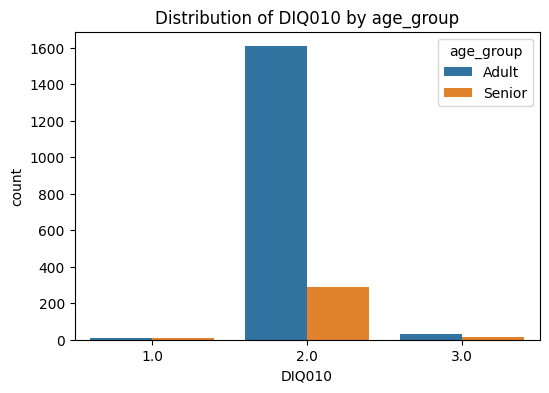

In [ ]:
cat_cols = ['RIAGENDR', 'PAQ605', 'DIQ010']
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='age_group', data=df)
    plt.title(f"Distribution of {col} by age_group")
    plt.legend(title="age_group", labels=["Adult", "Senior"])
    plt.show()

# Handle Imbalanced Data

In [ ]:
X = df.drop(columns = "age_group")
y = df["age_group"]

In [ ]:
X.shape

(1966, 7)

In [ ]:
y.value_counts()

,count
age_group,
0,1652
1,314


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Model Selection

## RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier()
cross_val_score(clf, X, y, scoring = "f1", cv = 10).mean()

np.float64(0.8830351722407064)

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'class_weight':[None, 'balanced']
}

rfc = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rfc,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=-1)

grid_search.fit(X, y)


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
870 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [24]:
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Best Parameters: {'class_weight': None, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best F1 Score: 0.884168281548766


## SVM

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

clf = SVC()
cross_val_score(clf, X, y, scoring = "f1", cv = 10).mean()

np.float64(0.6643885485458472)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])


param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['rbf', 'poly'],
    'svc__gamma': ['scale', 'auto'],
    'svc__class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(
    estimator=svc_pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__class_weight': [None, 'balanced'],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['rbf', 'poly']},
             scoring='f1')

In [27]:
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Best Parameters: {'svc__C': 10, 'svc__class_weight': None, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best F1 Score: 0.7702000304394243


## GB

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()

cross_val_score(clf, X, y, scoring = "f1", cv = 10).mean()

np.float64(0.8050615991856137)

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_sample_weight

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0]
}


gbc = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=gbc,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X, y)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='f1')

In [30]:
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}
Best F1 Score: 0.8355675468601798


# Submission

In [31]:
# Best Model: Random Forest Classifier
# Best Parameters: {'class_weight': None, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
# Best F1 Score: 0.884168281548766

In [32]:
clf = RandomForestClassifier(
    max_depth = 20,
    max_features= "sqrt",
    min_samples_leaf= 1,
    min_samples_split= 2,
    n_estimators = 450
)

cross_val_score(clf, X, y, scoring = "f1", cv = 10).mean()

np.float64(0.8883275160118107)

In [33]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

f1_score(y_test, y_pred)

0.8849270664505673

In [34]:
test_df = pd.read_csv("Test_Data.csv")
X_test = test_df.drop('SEQN', axis=1)

X_test = X_test[X.columns]

clf.fit(X, y)
y_test_pred = clf.predict(X_test)

submission = pd.DataFrame({'age_group': y_test_pred})
submission.to_csv("submission.csv", index=False)